# Notebook to analyze UV-vis data

In [92]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
def normalize(x):
    return (x-min(x))/(max(x)-min(x))

In [2]:
# Import data
data = pd.read_excel('./UV_Vis/CuOx data.xlsx', sheet_name='Sheet1')
columns = data.columns
data["Energy"] = (4.135667516E-15)*(299792458)/(data[columns[0]]*1E-9)
columns = data.columns
data.head()

,Wavelength nm.,glass,C0015_s1,C0015_R2,C0015_R2 white bckg,C0015_R2 white bckg.1,C0015_R1 white bckg,C0015_R1_1 white bckg,C0015_R1_3 white bckg,C0015_R3_1 white bckg,200mM CoOx_TotR,C0015_T1,C0015_T3,Energy
0,280.0,100.756,24.011,6.915,6.860,6.323,8.049,,15.980,9.476,,13.163,23.747,4.428007
1,280.5,100.517,24.000,6.927,6.874,6.309,8.054,,16.023,9.512,,13.158,23.728,4.420114
2,281.0,100.300,24.010,6.948,6.866,6.316,8.087,,16.094,9.548,,13.193,23.792,4.412249
3,281.5,100.229,23.902,6.978,6.903,6.278,8.109,,16.196,9.597,,13.160,23.813,4.404412
4,282.0,100.157,23.821,7.002,6.914,6.266,8.166,,16.233,9.636,,13.131,23.829,4.396603


In [3]:
columns

Index(['Wavelength nm.', 'glass', 'C0015_s1', 'C0015_R2',
       'C0015_R2 white bckg', 'C0015_R2 white bckg.1', 'C0015_R1 white bckg',
       'C0015_R1_1 white bckg', 'C0015_R1_3 white bckg',
       'C0015_R3_1 white bckg', '200mM CoOx_TotR', 'C0015_T1', 'C0015_T3',
       'Energy'],
      dtype='object')

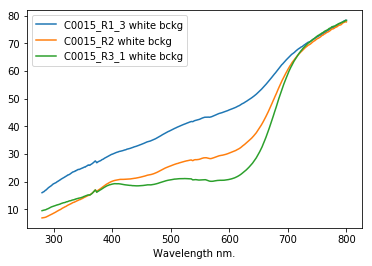

In [4]:
data.plot(x=columns[0], y=[columns[8], columns[4], columns[9]])

In [5]:
for column in [columns[8], columns[4], columns[9]]:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000003)*np.log(data[column]/100)
    name = column[0:8] + '_Tauc_direct'
    data[name] = np.power(data['Energy'], 2) * np.power(alpha, 2)
    
columns = data.columns

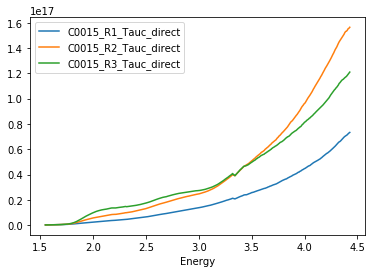

In [6]:
data.plot(x='Energy', y=[columns[14], columns[15], columns[16]])

In [7]:
for column in [columns[8], columns[4], columns[9]]:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000003)*np.log(data[column]/100)
    name = column[0:8] + '_Tauc_indirect'
    data[name] = np.power(data['Energy'], 0.5) * np.power(alpha, 0.5)
    
columns = data.columns

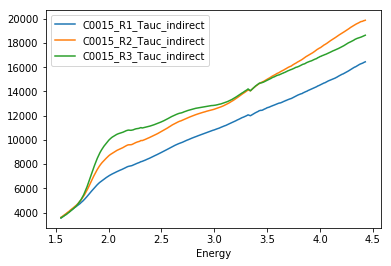

In [8]:
data.plot(x='Energy', y=[columns[17], columns[18], columns[19]])

In [73]:
sample3_T = data['C0015_T3']/100
sample3_R = data['C0015_R3_1 white bckg']/100

In [74]:
alpha3_simple = np.log(sample3_T + sample3_R)
alpha3_apprx = np.log((sample3_T)/np.power(1-sample3_R, 2))
alpha3_cmplx = (-1/30E-9)*np.log((np.sqrt(np.power(1-sample3_R, 4) + 4*np.power(sample3_T, 2)*np.power(sample3_R, 2)) - np.power((1-sample3_R),2))/(2*sample3_T*np.power(sample3_R, 2)))

In [75]:
tauc3_simple = np.power(alpha3_simple, 2) * np.power(data['Energy'], 2)
tauc3_apprx = np.power(alpha3_apprx, 2) * np.power(data['Energy'], 2)
tauc3_cmplx = np.power(alpha3_cmplx, 2) * np.power(data['Energy'], 2)

In [78]:
df = pd.concat([data['Energy'], normalize(tauc3_simple), 
                normalize(tauc3_apprx), normalize(tauc3_cmplx)], axis=1)

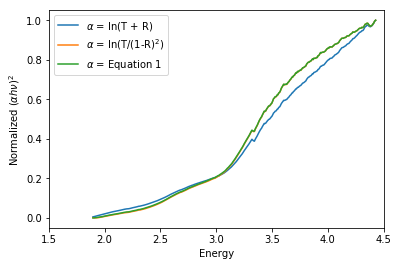

In [124]:
df[0:750].plot(x='Energy')
plt.xlabel('Energy')
plt.xlim(1.5, 4.5)
plt.ylabel(r'Normalized ($\alpha h \nu$)$^2$')
plt.legend([r'$\alpha$ = ln(T + R)', 
            r'$\alpha$ = ln(T/(1-R)$^2$)',
           r'$\alpha$ = Equation 1'])
plt.savefig('tauc_plots.png', dpi=300)

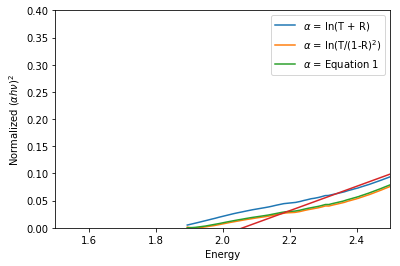

In [129]:
df[200:750].plot(x='Energy')
plt.plot(xx, yy)
plt.xlabel('Energy')
plt.xlim(1.5, 2.5)
plt.ylim(0, 0.4)
plt.ylabel(r'Normalized ($\alpha h \nu$)$^2$')
plt.legend([r'$\alpha$ = ln(T + R)', 
            r'$\alpha$ = ln(T/(1-R)$^2$)',
           r'$\alpha$ = Equation 1'])
plt.savefig('tauc_plots_fit.png', dpi=300)

In [112]:
x = df['Energy'][267:431]
y = df[0][267:431]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [126]:
xx = np.arange(1.5, 3.5, 0.1)
yy = slope*xx + intercept
print(-intercept/slope)

2.06017258661


In [119]:
np.arange(1.5, 3.5, 0.1)

array([ 1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4])

In [ ]:
df[200:750].plot(x='Energy')
plt.plot(xx, yy)
plt.xlabel('Energy')
#plt.xlim(1.5, 4.5)
plt.ylim(0, 0.4)
plt.ylabel(r'Normalized ($\alpha h \nu$)$^2$')
plt.legend([r'$\alpha$ = ln(T + R)', 
            r'$\alpha$ = ln(T/(1-R)$^2$)',
           r'$\alpha$ = Equation 1'])
plt.savefig('tauc_plots_fit.png', dpi=300)